In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from river import ensemble
from river import compose
from river import preprocessing
from river import tree

from source.bank_dataset import BankDataset
from source.river_utils import evaluate_binary_model

In [3]:
sns.set(rc={'figure.figsize':(15, 5)})

In [4]:
# Creating a data frame
df = pd.read_csv("../datasets/folktables-NY-2018.csv", delimiter=',')
df.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,ESR
0,26,21.0,5,17,2,0.0,5,1.0,4.0,1,2,2,2,2.0,2,1,0
1,21,20.0,5,17,2,0.0,1,3.0,4.0,1,1,2,2,2.0,1,1,1
2,18,16.0,5,17,2,0.0,2,3.0,4.0,1,1,2,2,2.0,2,8,0
3,85,16.0,2,16,1,0.0,1,1.0,4.0,4,1,1,2,1.0,2,1,0
4,19,19.0,5,17,2,0.0,1,1.0,4.0,2,1,2,2,2.0,2,1,1


In [6]:
df.columns

Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR'],
      dtype='object')

In [5]:
df['ESR'].value_counts()

0    105498
1     91469
Name: ESR, dtype: int64

In [217]:
dataset = BankDataset()
counts = collections.Counter(y for _, y in dataset)

for c, count in counts.items():
    print(f'{c}: {count} ({count / sum(counts.values()):.5%})')

no: 36548 (88.73458%)
yes: 4640 (11.26542%)


### Predict with River classification models

#### Apply data transformations

In [218]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
selected_categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']
numerical_features = (feature for feature in df.columns if feature not in categorical_features + ['y'])

transform_pipeline = compose.Select(selected_categorical_features[0])
for feature in selected_categorical_features[1:]:
    transform_pipeline += compose.Select(feature)
transform_pipeline |= preprocessing.OneHotEncoder()

for feature in numerical_features:
    transform_pipeline += compose.Select(feature)
transform_pipeline |= preprocessing.MinMaxScaler()

for idx, (x, y) in enumerate(bank_dataset):
    print(f'Initial features: {x}\n')
    x = transform_pipeline.transform_one(x)
    print(f'Transformed features: {x}\n\n')
    if idx + 1 == 10:
        break

Initial features: {'age': 56, 'job': 'housemaid', 'marital': 'married', 'education': 'basic.4y', 'default': 'no', 'housing': 'no', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'mon', 'duration': 261, 'campaign': 1, 'pdays': 999, 'previous': 0, 'poutcome': 'nonexistent', 'emp.var.rate': 1.1, 'cons.price.idx': 93.994, 'cons.conf.idx': -36.4, 'euribor3m': 4.857, 'nr.employed': 5191.0}

Transformed features: {'nr.employed': 0.0, 'euribor3m': 0.0, 'cons.conf.idx': 0.0, 'cons.price.idx': 0.0, 'emp.var.rate': 0.0, 'previous': 0.0, 'pdays': 0.0, 'campaign': 0.0, 'duration': 0.0, 'age': 0.0, 'poutcome_nonexistent': 0.0, 'loan_no': 0.0, 'housing_no': 0.0, 'education_basic.4y': 0.0, 'marital_married': 0.0, 'job_housemaid': 0.0}


Initial features: {'age': 57, 'job': 'services', 'marital': 'married', 'education': 'high.school', 'default': 'unknown', 'housing': 'no', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'mon', 'duration': 149, 'campaign': 1, '

#### Predict with Adaptive Random Forest Classifier

Index: 1000; Accuracy: 98.10%; WeightedF1: 97.16%
Index: 2000; Accuracy: 97.90%; WeightedF1: 96.86%
Index: 3000; Accuracy: 97.63%; WeightedF1: 96.46%
Index: 4000; Accuracy: 97.22%; WeightedF1: 95.86%
Index: 5000; Accuracy: 97.10%; WeightedF1: 95.67%
Index: 6000; Accuracy: 97.02%; WeightedF1: 95.55%
Index: 7000; Accuracy: 97.06%; WeightedF1: 95.61%
Index: 8000; Accuracy: 96.87%; WeightedF1: 95.34%
Index: 9000; Accuracy: 96.72%; WeightedF1: 95.12%
Index: 10000; Accuracy: 96.67%; WeightedF1: 95.04%
Index: 11000; Accuracy: 96.60%; WeightedF1: 94.94%
Index: 12000; Accuracy: 96.51%; WeightedF1: 94.80%
Index: 13000; Accuracy: 96.38%; WeightedF1: 94.62%
Index: 14000; Accuracy: 96.19%; WeightedF1: 94.33%
Index: 15000; Accuracy: 95.99%; WeightedF1: 94.04%
Index: 16000; Accuracy: 95.75%; WeightedF1: 93.70%
Index: 17000; Accuracy: 95.68%; WeightedF1: 93.61%
Index: 18000; Accuracy: 95.59%; WeightedF1: 93.47%
Index: 19000; Accuracy: 95.59%; WeightedF1: 93.47%
Index: 20000; Accuracy: 95.43%; Weighted

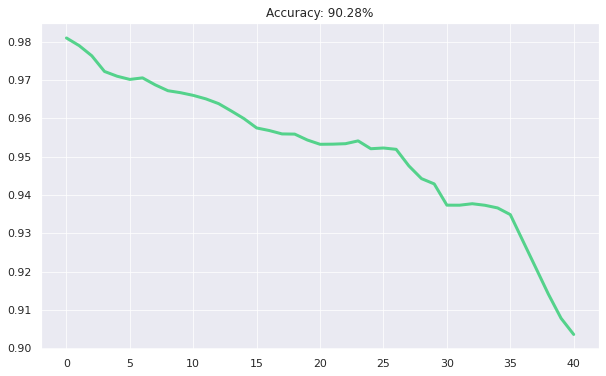

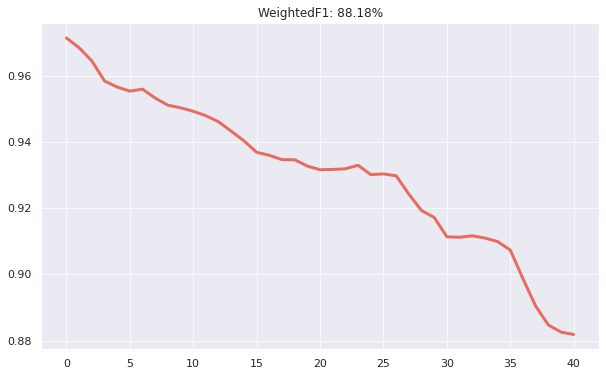

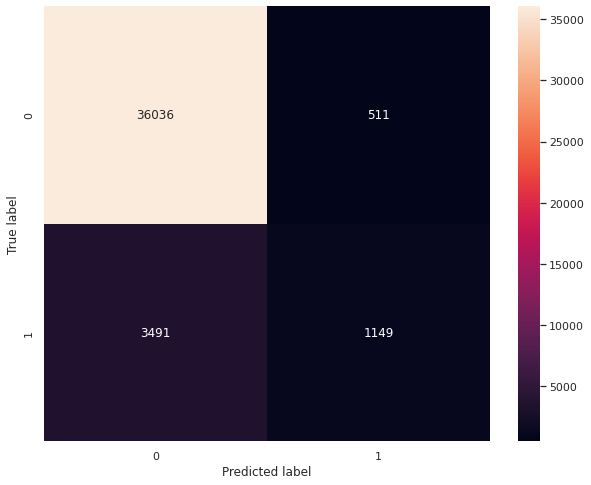

In [206]:
ARF_model = transform_pipeline | ensemble.AdaptiveRandomForestClassifier(n_models=20, seed=42, split_criterion='gini')
evaluate_binary_model(bank_dataset, ARF_model)

#### Predict with Streaming Random Patches ensemble classifier

Index: 1000; Accuracy: 97.80%; WeightedF1: 97.41%
Index: 2000; Accuracy: 97.40%; WeightedF1: 97.05%
Index: 3000; Accuracy: 97.23%; WeightedF1: 96.72%
Index: 4000; Accuracy: 96.90%; WeightedF1: 96.23%
Index: 5000; Accuracy: 96.82%; WeightedF1: 96.20%
Index: 6000; Accuracy: 96.78%; WeightedF1: 96.11%
Index: 7000; Accuracy: 96.83%; WeightedF1: 96.16%
Index: 8000; Accuracy: 96.69%; WeightedF1: 96.00%
Index: 9000; Accuracy: 96.56%; WeightedF1: 95.83%
Index: 10000; Accuracy: 96.49%; WeightedF1: 95.79%
Index: 11000; Accuracy: 96.39%; WeightedF1: 95.73%
Index: 12000; Accuracy: 96.37%; WeightedF1: 95.76%
Index: 13000; Accuracy: 96.28%; WeightedF1: 95.65%
Index: 14000; Accuracy: 96.18%; WeightedF1: 95.55%
Index: 15000; Accuracy: 95.98%; WeightedF1: 95.37%
Index: 16000; Accuracy: 95.74%; WeightedF1: 95.12%
Index: 17000; Accuracy: 95.66%; WeightedF1: 95.09%
Index: 18000; Accuracy: 95.60%; WeightedF1: 95.02%
Index: 19000; Accuracy: 95.61%; WeightedF1: 95.04%
Index: 20000; Accuracy: 95.51%; Weighted

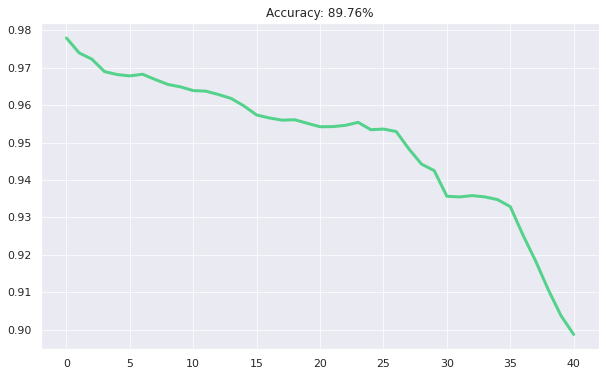

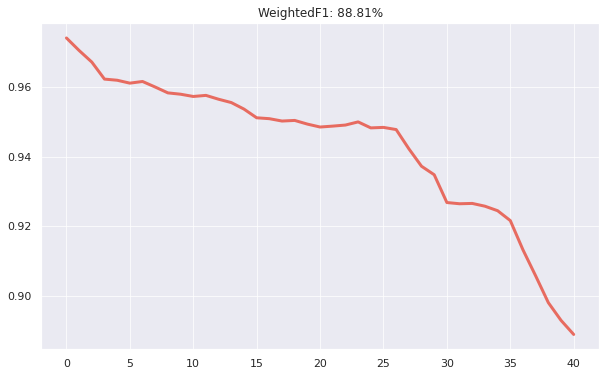

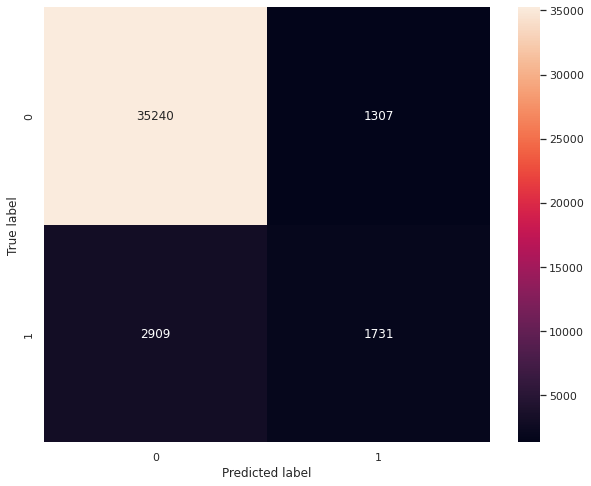

In [219]:
base_model = tree.HoeffdingTreeClassifier(
     grace_period=50, delta=0.01
)
SRP_model_obj = ensemble.SRPClassifier(
     model=base_model, n_models=3, seed=42
)
SRP_model = transform_pipeline | SRP_model_obj
evaluate_binary_model(bank_dataset, SRP_model)